# <font color = 'orange'> Time Series 

---

## Steps:

1. Data Ingestion.

2. EDA.

3. Preprocessing.

4. Model Building.

5. Model Evalution.

---

##  <font color = 'Blue'>1. Data Ingestion

* Import the Required Libraries: Import the required libraries such as pandas, numpy, matplotlib, seaborn, etc.

* Load the Data.

* Load the Time Series Data into a pandas dataframe.

* Set the datetime column as the index of the dataframe.

* Check the datatype of the index and convert it to datetime if necessary.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('TSLA.csv')

df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0
...,...,...,...,...,...,...,...,...
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0


### <font color = '#AA00FF'> Observation :
* This is a time series data as we have a time related column in our dataset.

---

### Univariate time series analysics - only 1 independent and 1 dependent feature

In [3]:
stock_data = df[['Date','Close']]

stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


---

### Change data type

In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


### <font color = '#AA00FF'> Observation :
* We can notice that our date column is a object type but it should be in DateTime type.

In [5]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data

C:\Users\darsh\AppData\Local\Temp\ipykernel_30640\1165095172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])


,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


---

### Setting date time as index

In [7]:
stock_data.set_index('Date',inplace = True)

stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


### <font color = '#AA00FF'> Observation : 
### why we are converting date column as a index column?..

1. i can easily retrive the data
2. visulization is also simple
3. those lib has been degine in such a way it required date column as a index(scipy statsmodel)

---

##  <font color = 'Blue'>2. Exploratory Data Analysis(EDA)

1. Summary Statistics
    - Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.  
    

2. Visualize the Time Series Data
    - Plot the Time Series data 
    - Plot the rolling mean and rolling standard deviation of the Time Series data.
    - Decompose the Time Series Data check for any trends, seasonality, and Noise.
    - Plot the decomposed components to get a better understanding of the Time Series data.  
    
    
3. Stationarity Check
    - Check for stationarity.
    - Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.  
    
    
4. Check for Autocorrelation
    - Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.  
    
    
5. Outlier Detection
    - Detect and handle outliers using statistical methods or machine learning techniques.  
    
    
6. Check for Autocorrelation
    - Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.  

### Statistics of data

In [8]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


---

### Plot of data

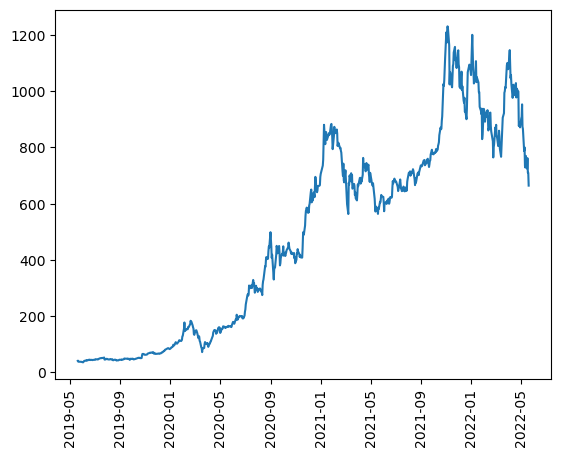

In [9]:
plt.plot(stock_data)

plt.xticks(rotation = 90)

plt.show()

---

### Finding distribution

<AxesSubplot:ylabel='Count'>

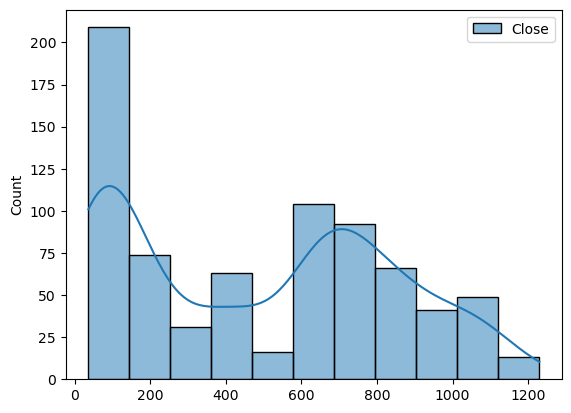

In [10]:
sns.histplot(stock_data, kde = True)

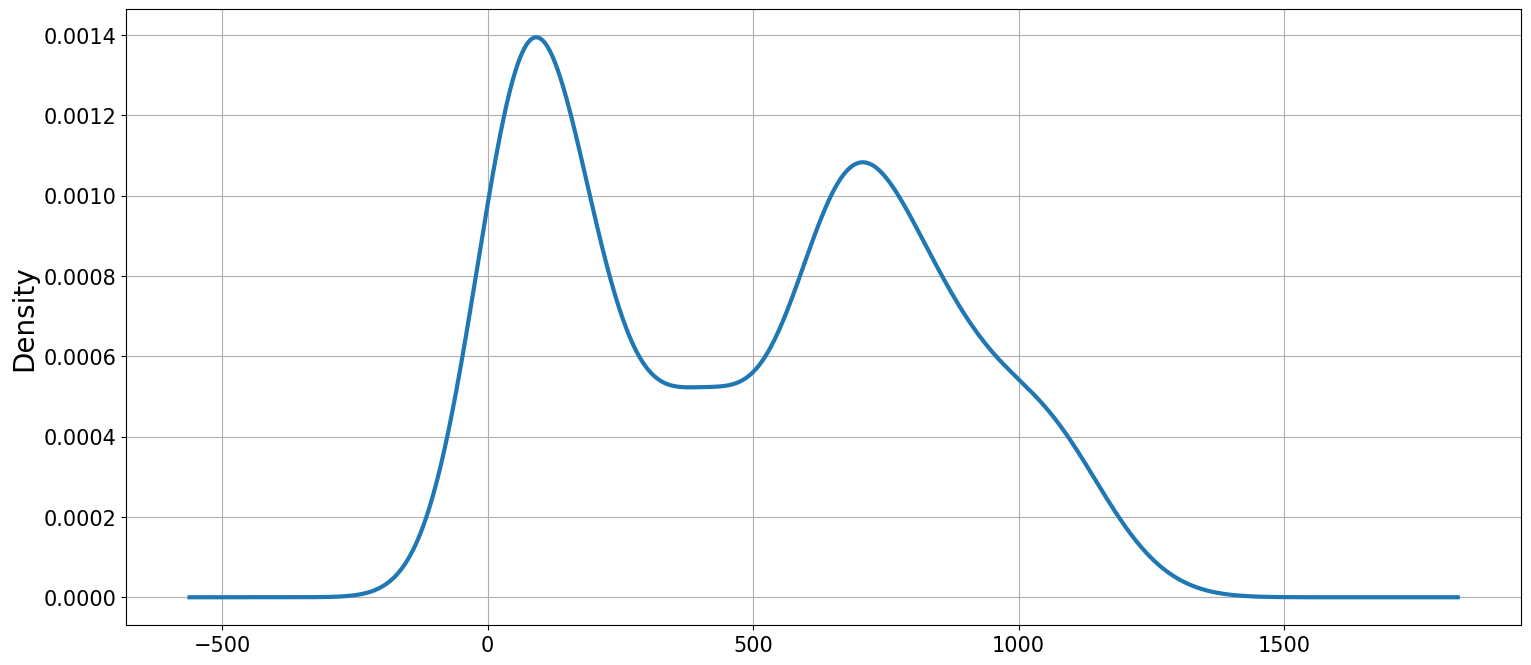

In [11]:
# Plotting using matplotlib

df_close = stock_data['Close'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

---

### Rolling mean 

In [12]:
rol_mean = stock_data['Close'].rolling(window = 12).mean()

rol_mean

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    826.467504
2022-05-17    817.371668
2022-05-18    801.277501
2022-05-19    784.625000
2022-05-20    760.565002
Name: Close, Length: 758, dtype: float64

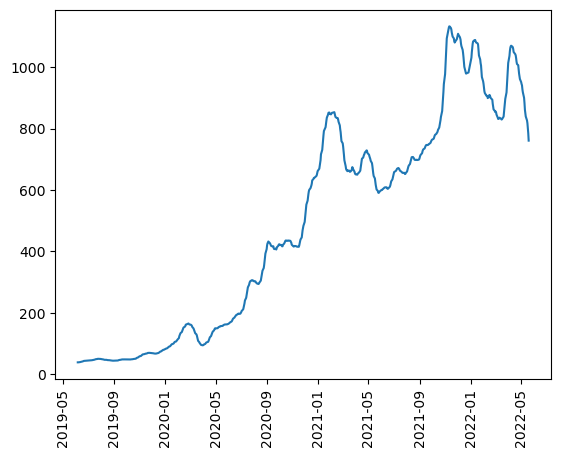

In [13]:
plt.plot(rol_mean)

plt.xticks(rotation = 90)

plt.show()

### <font color = '#AA00FF'> Observation : 
* We can see the smooth graph.
* Increase in window size increase the soomthness of the graph 

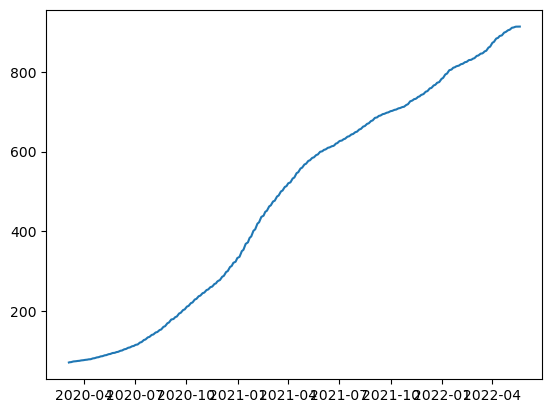

In [14]:
# increase in window size increase the soomtness can be observed 
plt.plot(stock_data['Close'].rolling(window = 200).mean())

---

### Rolling std

In [15]:
rol_std = stock_data['Close'].rolling(window = 12).std()

rol_std

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23          NaN
2019-05-24          NaN
2019-05-28          NaN
                ...    
2022-05-16    78.887958
2022-05-17    79.606002
2022-05-18    80.253903
2022-05-19    76.455365
2022-05-20    63.033361
Name: Close, Length: 758, dtype: float64

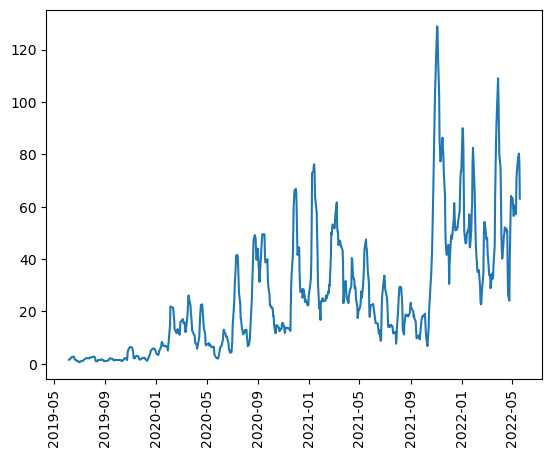

In [16]:
plt.plot(rol_std)

plt.xticks(rotation = 90)

plt.show()

---

### Combining all at one place

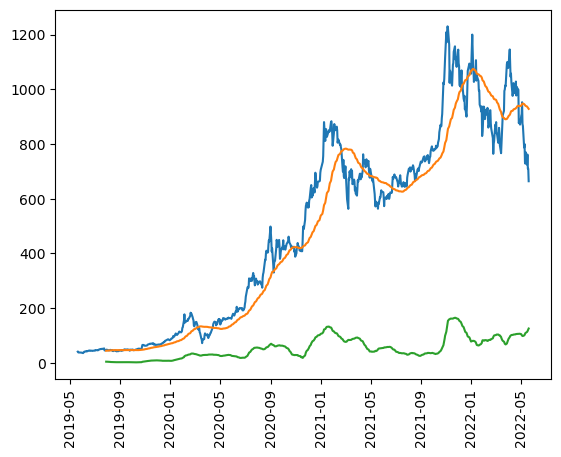

In [17]:
plt.plot(stock_data['Close'])
plt.plot(stock_data['Close'].rolling(window = 48).mean())
plt.plot(stock_data['Close'].rolling(window = 48).std())

plt.xticks(rotation = 90)
plt.show()

### <font color = '#AA00FF'> Observation : 
* This is not a stationary time series as because mean is increasing.

---

### ADF Test = Augmented Dikey Fullar Test

In [18]:
from statsmodels.tsa.stattools import adfuller

adft = adfuller(stock_data['Close'])

adft

(-1.3630085817037487,
 0.5998762543050697,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [19]:
pd.Series(adft[:4],index = ['test stats','p-value','lag','data points'])

test stats      -1.363009
p-value          0.599876
lag              9.000000
data points    748.000000
dtype: float64

### <font color = '#AA00FF'> Observation : 
* Fail to Reject the null hypothesis as p>0.05

---

### Test for stationary 

In [20]:
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

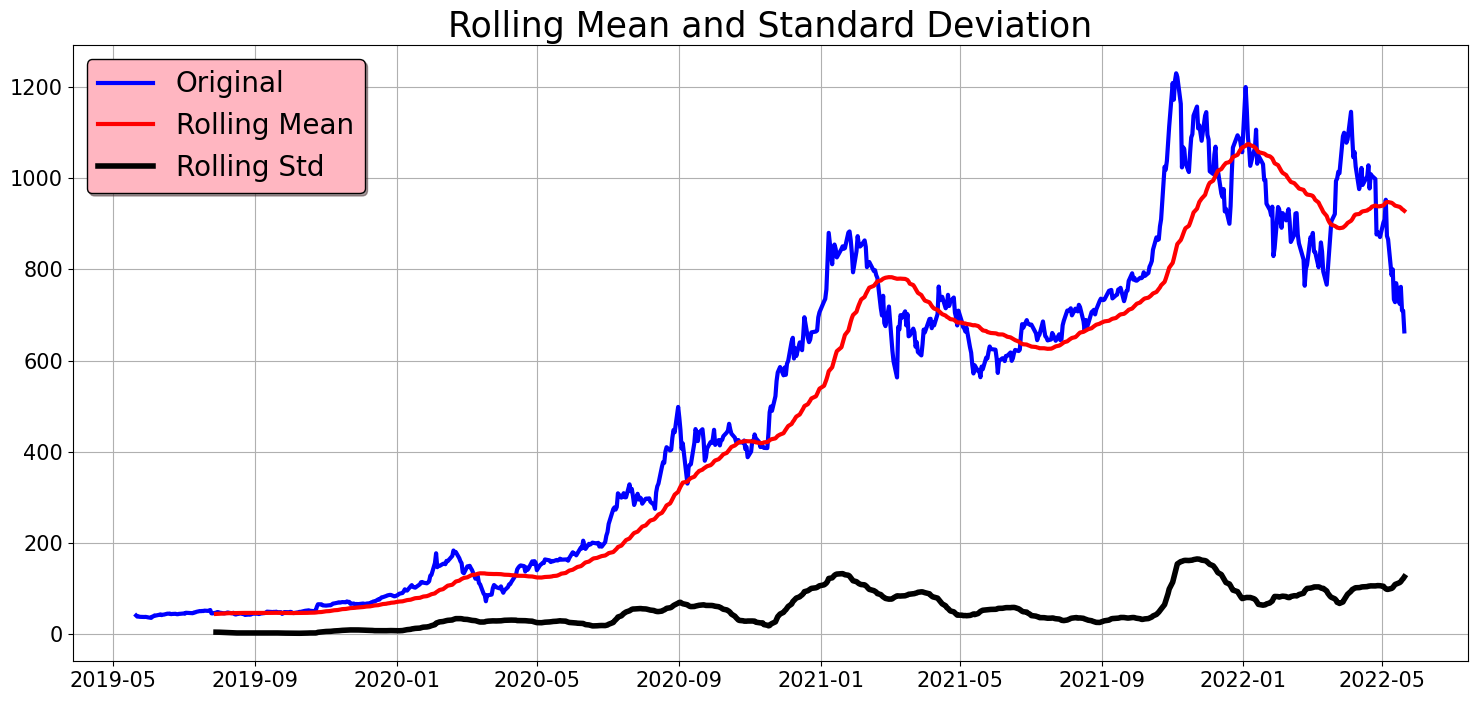

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [21]:
test_stationarity(stock_data.Close)

### <font color = '#AA00FF'> Observation : 
* Data is not stationary.

---

### Decompose with additive

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(stock_data[['Close']], period = 12)

result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

<Figure size 2000x1000 with 0 Axes>

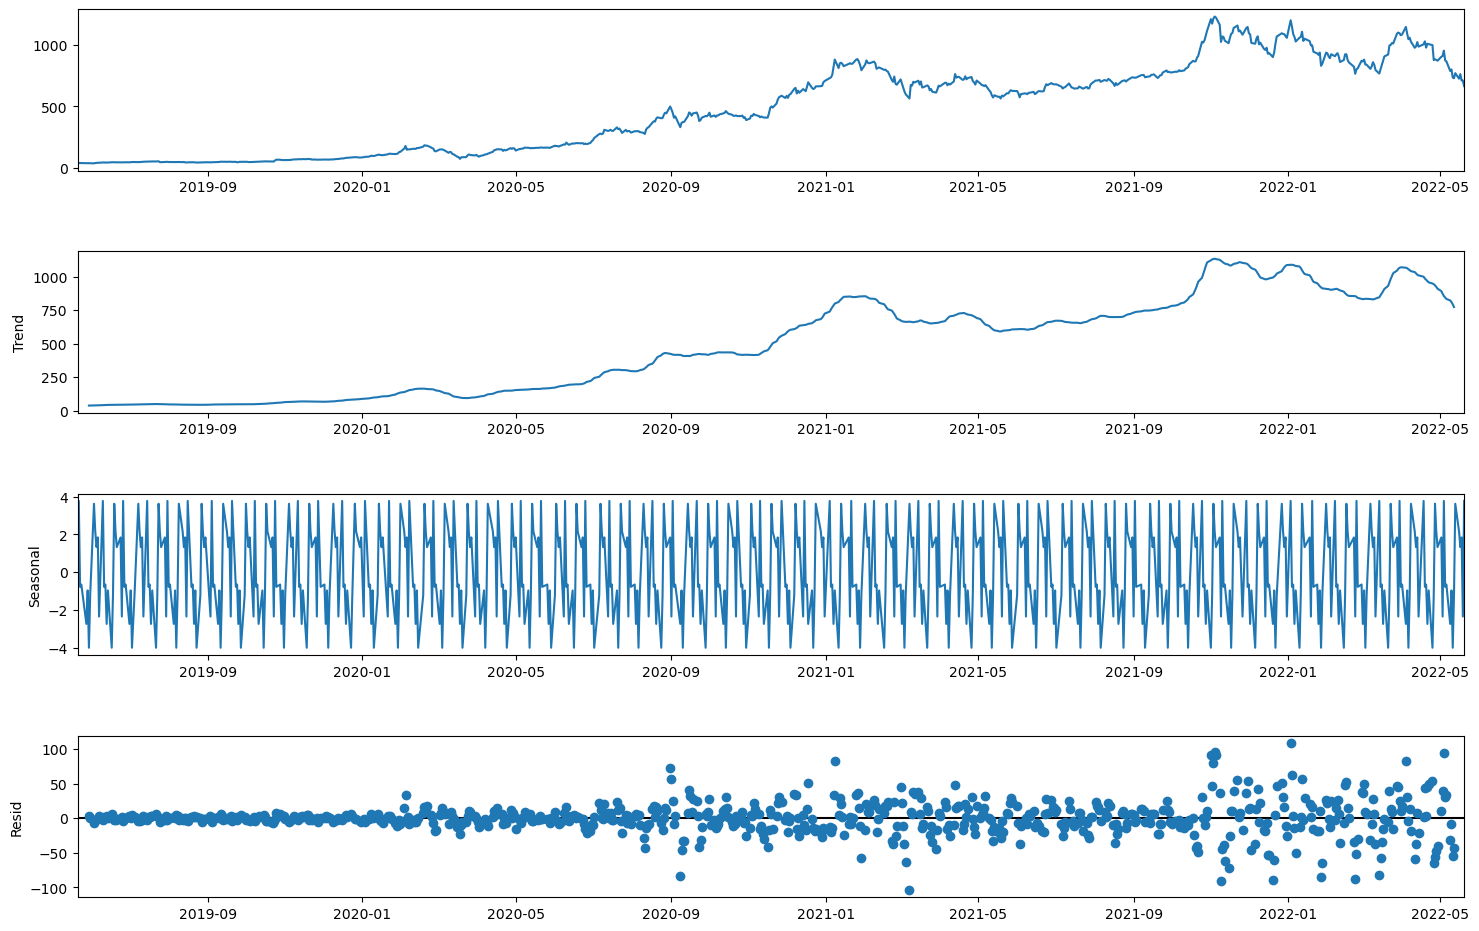

In [23]:
fig = plt.figure(figsize = (20, 10))
fig = result.plot()
fig.set_size_inches(17, 10)

---

### Decompose with multiplicative

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(stock_data[['Close']], period = 12, model = 'multiplicative')

result.seasonal

Date
2019-05-21    0.998285
2019-05-22    1.007787
2019-05-23    0.997675
2019-05-24    0.992710
2019-05-28    0.988533
                ...   
2022-05-16    1.005393
2022-05-17    1.007126
2022-05-18    1.003538
2022-05-19    0.998285
2022-05-20    1.007787
Name: seasonal, Length: 758, dtype: float64

<Figure size 2000x1000 with 0 Axes>

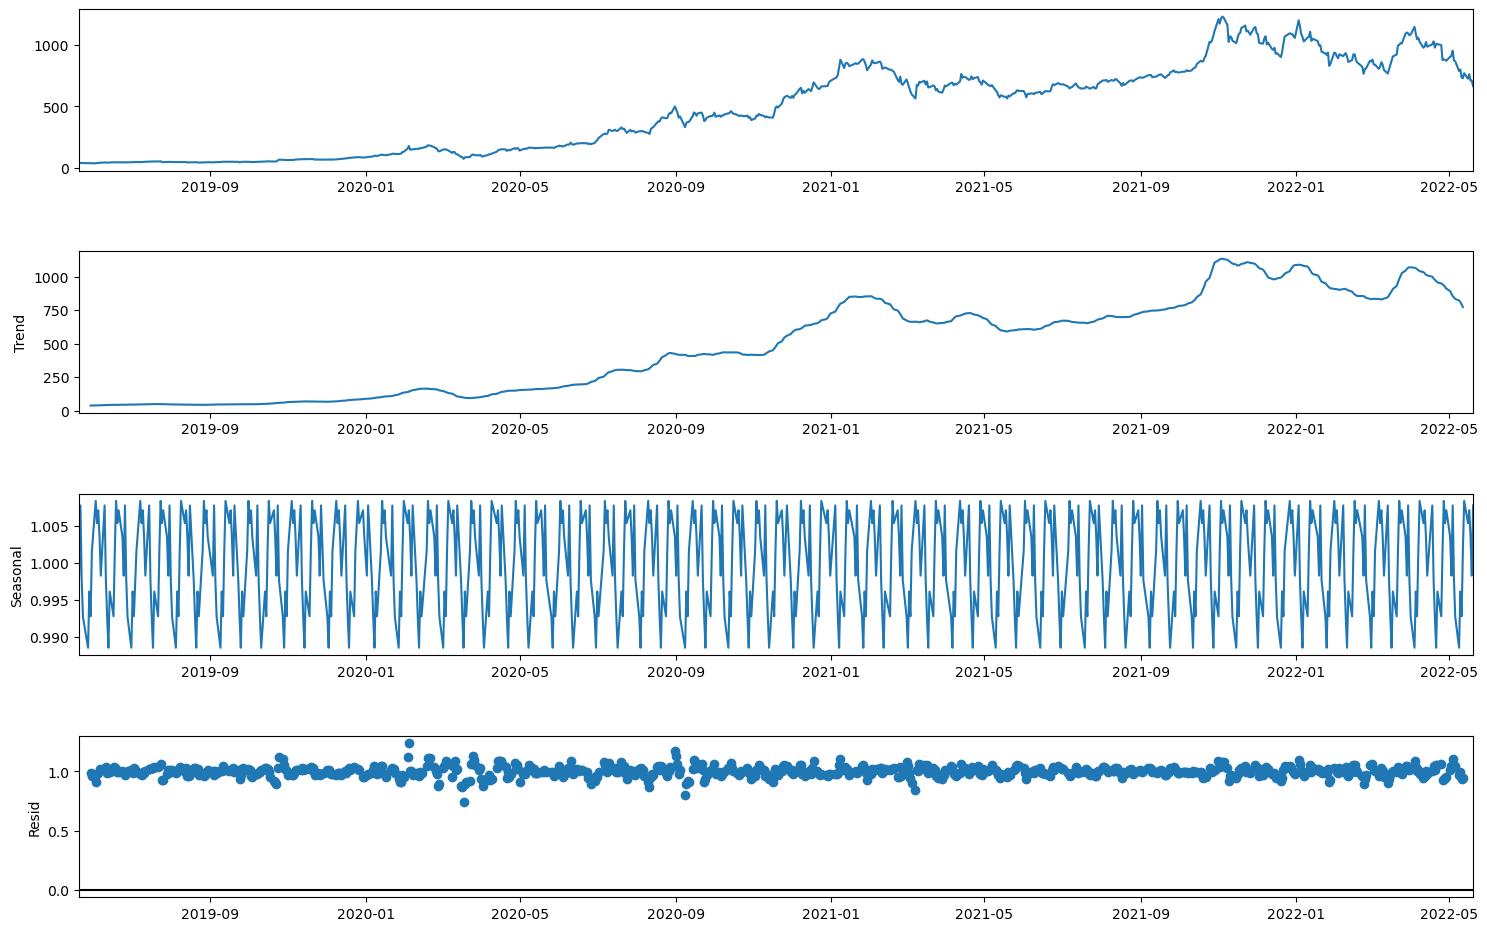

In [25]:
fig = plt.figure(figsize = (20, 10))
fig = result.plot()
fig.set_size_inches(17, 10)

---

### Checking outliers

<AxesSubplot:xlabel='Close'>

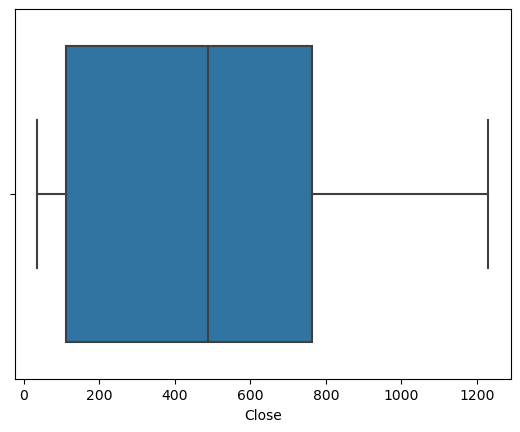

In [26]:
sns.boxplot(x = stock_data.Close)

### <font color = '#AA00FF'> Observation : 
* No outlier in the dataset.

---

### Auto Correlation Function and Partial Auto Correlation Function

D:\Anconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


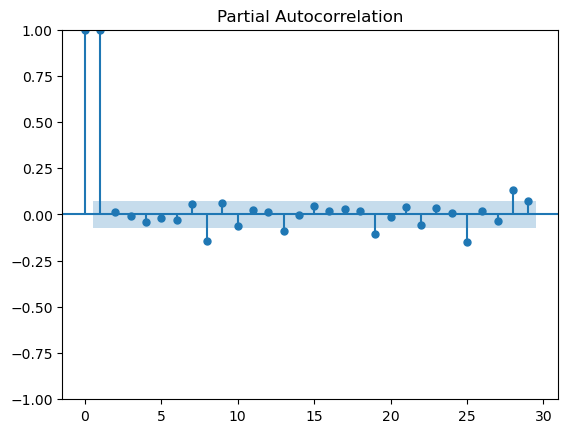

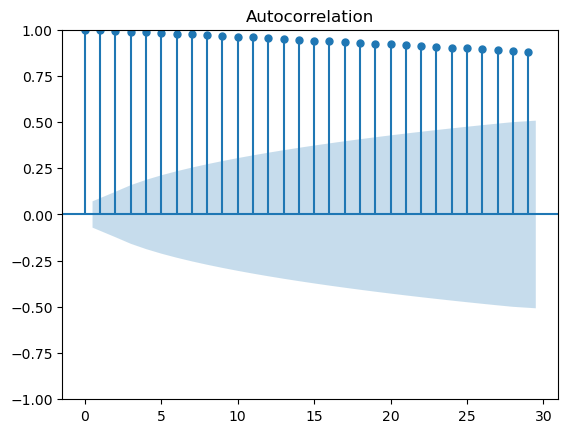

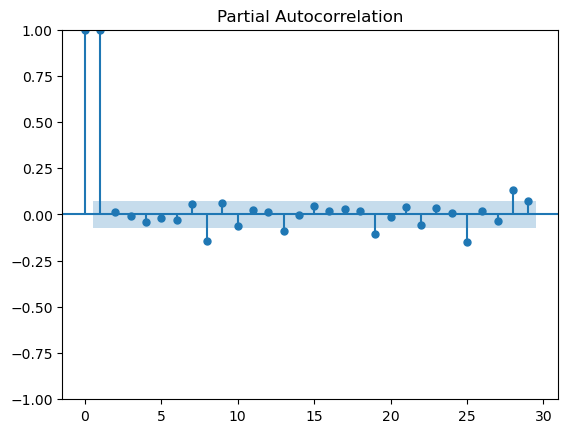

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(stock_data.Close)

plot_pacf(stock_data.Close)

---

##  <font color = 'Blue'>3. Preprocessing of the Data.  
    
1. Fill the missing values.
2. Convert data into the stationary time series.
3. If necessay then normalize the data.
4. Split the data into train and test.
5. Clean the data by removing the outliers.

In [28]:
df_close = stock_data['Close'].diff()
# df_close = stock_data['Close'].diff(2)

df_close = df_close.dropna()

df_close

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 757, dtype: float64

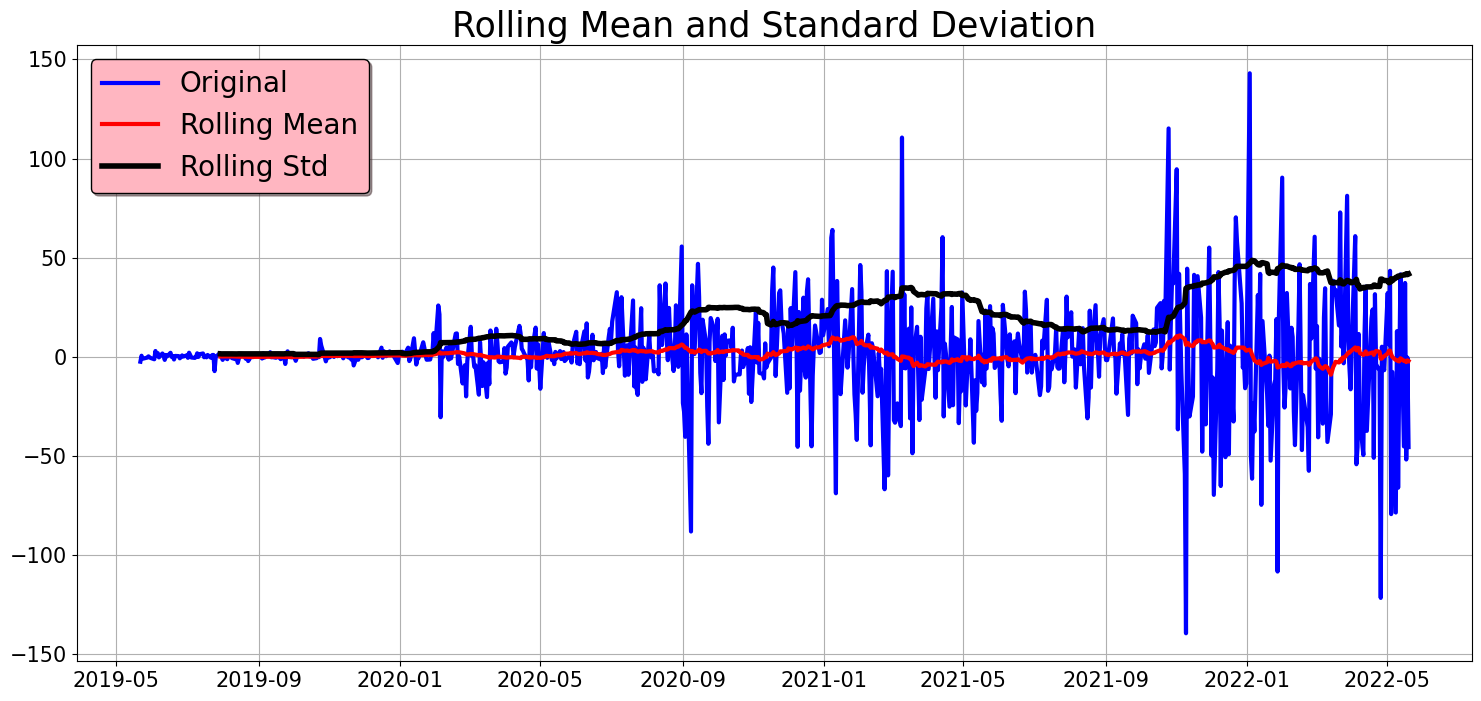

Results of dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of lags used               8.000000e+00
Number of observations used    7.480000e+02
critical value (1%)           -3.439123e+00
critical value (5%)           -2.865412e+00
critical value (10%)          -2.568832e+00
dtype: float64


In [29]:
test_stationarity(df_close)

D:\Anconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


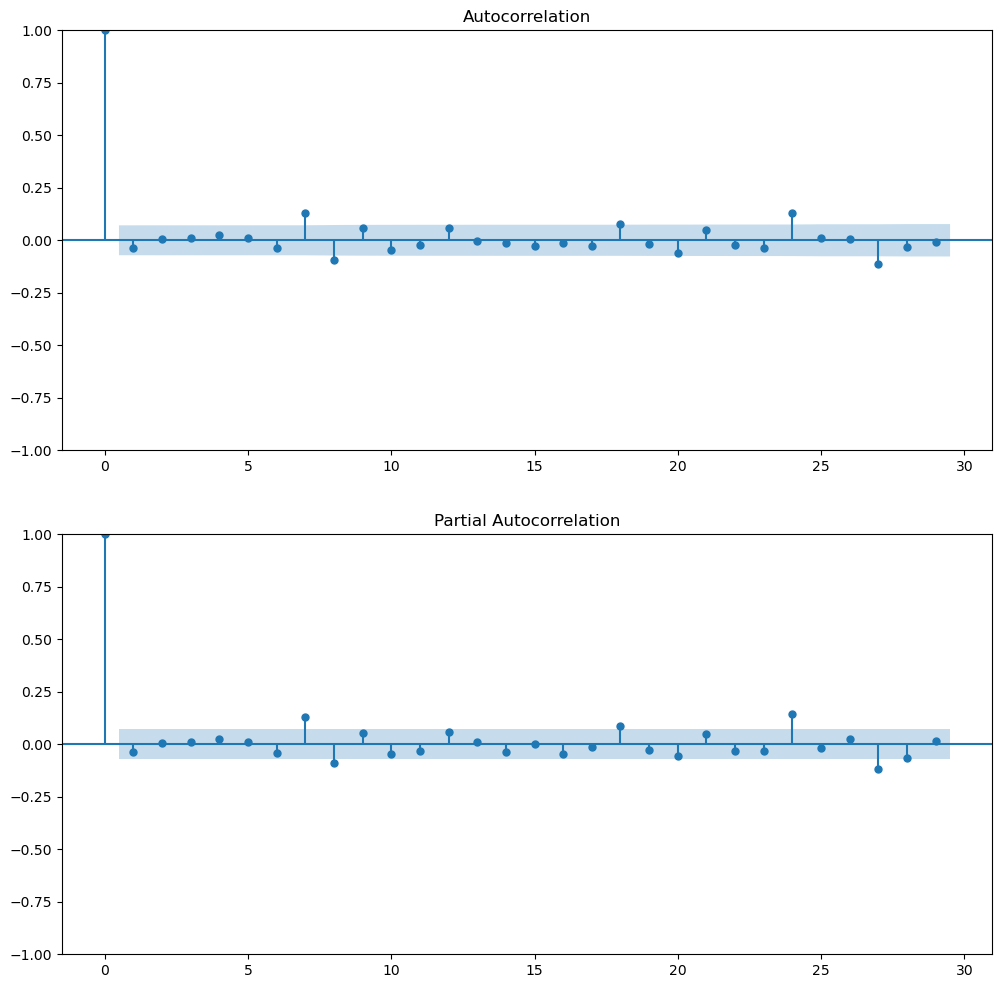

In [30]:
fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(211)
fig = plot_acf(df_close, ax = ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df_close, ax = ax2)

---

##  <font color = 'Blue'>4. Model Building

In [31]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [32]:
train_data = stock_data['Close'][0:-60]
test_data = stock_data['Close'][-60:]

### <font color = '#AA00FF'> Observation : 
* Last 60 records are the test data.

In [34]:
history = [x for x in train_data]
history

[41.01599884033203,
 38.54600143432617,
 39.09799957275391,
 38.1259994506836,
 37.7400016784668,
 37.97200012207031,
 37.64400100708008,
 37.03200149536133,
 35.79399871826172,
 38.720001220703125,
 39.31800079345703,
 41.18999862670898,
 40.900001525878906,
 42.57600021362305,
 43.41999816894531,
 41.85200119018555,
 42.78200149536133,
 42.98400115966797,
 45.00600051879883,
 44.948001861572266,
 45.2859992980957,
 43.92399978637695,
 44.37200164794922,
 44.72800064086914,
 43.95199966430664,
 43.854000091552734,
 44.56800079345703,
 44.69200134277344,
 45.43399810791016,
 44.90999984741211,
 46.97999954223633,
 46.619998931884766,
 46.06800079345703,
 46.012001037597656,
 47.78400039672852,
 47.720001220703125,
 49.01599884033203,
 50.70000076293945,
 50.47600173950195,
 50.97200012207031,
 50.70800018310547,
 51.63600158691406,
 51.13600158691406,
 52.03400039672852,
 52.97600173950195,
 45.76399993896485,
 45.608001708984375,
 47.15399932861328,
 48.45199966430664,
 48.32199859619

In [35]:
# p, d and q is the order
model = ARIMA(history, order = (1,1,1))

model

In [36]:
model = model.fit()

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Sun, 05 Nov 2023   AIC                           6306.700
Time:                        09:26:55   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

---

### Forcasting - will predict the next value output

In [41]:
# actual value
test_data[0]

809.8699951171875

In [40]:
# predicted value
# forecast will give output for the next time series 
model.forecast()

array([800.20438328])

### <font color = '#AA00FF'> Observation : 
* For test data 0 we got the output using forecast.

---

### Mean squared error

In [47]:
# actual value is test_data[0]
# predicted value is model.forecast()
mse = mean_squared_error([test_data[0]],model.forecast())

mse

93.42405216417569

In [49]:
import numpy as np 

rmse = np.sqrt(mse)

rmse

9.665611835997538

---

In [50]:
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

In [51]:
# we need the combination for p, d and q
# p = Absoulte Regression
# d = Intergration
# q = Moving Average

for i in p_values:
    for j in d_values:
        for k in q_values:
            print(i,j,k)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


---

### Training model with all combination and selecting the best combination

In [68]:
# this function will return the rmse value for the given order
def train_arima_model(X, y, arima_order):
    history = [x for x in X]
    predictions = []
    for t in range(len(y)):
        model = ARIMA(history, order = arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [69]:
def evaluate_model(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                rmse = train_arima_model(dataset, test, order)
                if rmse < best_score:
                    best_score, best_cfg = rmse, order
                print(f'Arima {order} RMSE = {rmse}')
    print(f'Best Arima {best_cfg} RMSE =  {best_score}')

In [70]:
from warnings import filterwarnings
filterwarnings('ignore')

p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_model(train_data, test_data, p_values, d_values, q_values)

Arima (0, 0, 0) RMSE = 457.4144131894897
Arima (0, 0, 1) RMSE = 241.1637806510686
Arima (0, 0, 2) RMSE = 178.23348323258244
Arima (0, 1, 0) RMSE = 39.51639749939755
Arima (0, 1, 1) RMSE = 39.48249922421976
Arima (0, 1, 2) RMSE = 39.61692064362063
Arima (0, 2, 0) RMSE = 57.83467097428168
Arima (0, 2, 1) RMSE = 39.61136989254234
Arima (0, 2, 2) RMSE = 39.57965698666259
Arima (1, 0, 0) RMSE = 39.47656520492454
Arima (1, 0, 1) RMSE = 39.4493647234132
Arima (1, 0, 2) RMSE = 39.583866865572396
Arima (1, 1, 0) RMSE = 39.475298282052975
Arima (1, 1, 1) RMSE = 39.55461742250451
Arima (1, 1, 2) RMSE = 39.9345699183836
Arima (1, 2, 0) RMSE = 46.18446517231776
Arima (1, 2, 1) RMSE = 39.57302179078922
Arima (1, 2, 2) RMSE = 39.73080170463229
Arima (2, 0, 0) RMSE = 39.43992511710177
Arima (2, 0, 1) RMSE = 39.49398430617271
Arima (2, 0, 2) RMSE = 39.580973588175034
Arima (2, 1, 0) RMSE = 39.63474154718153
Arima (2, 1, 1) RMSE = 39.75912624426665
Arima (2, 1, 2) RMSE = 39.62894253829569
Arima (2, 2, 0

### <font color = '#AA00FF'> Observation : 
* We got less error in the order 2,0,0. So, let's trian model with this order.

---

### Train model with the best order 

In [72]:
history = [x for x in train_data]
predictions = []
for i in range(len(test_data)):
    model = ARIMA(history, order = (2, 0, 0))
    model = model.fit()    
    # fc = model.forecast(alpha = 0.05)
    fc = model.forecast()
    predictions.append(fc)
    history.append(test_data[i])

print(f'RMSE is {np.sqrt(mean_squared_error(test_data, predictions))}')

RMSE is 39.439912696321095


---

### Visualize for test data

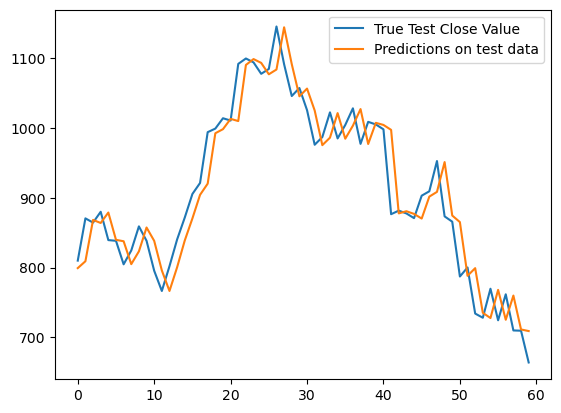

In [77]:
plt.plot(range(len(test_data)), test_data, label = 'True Test Close Value')
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data')

plt.legend()

---

### Visualize for the entire data

In [79]:
fc_series = pd.Series(predictions, index = test_data.index)
fc_series

Date
2022-02-25     [799.1426171557473]
2022-02-28     [808.9792963319908]
2022-03-01     [868.2636064921885]
2022-03-02      [863.810220849396]
2022-03-03     [878.7857744912217]
2022-03-04     [839.6820019264477]
2022-03-07     [837.6330852806586]
2022-03-08     [804.8108103089676]
2022-03-09     [823.1708649699183]
2022-03-10     [857.3630287523865]
2022-03-11     [838.1984550252969]
2022-03-14     [795.7993766010693]
2022-03-15     [766.3876592566625]
2022-03-16      [800.356717804509]
2022-03-17     [838.7344224048292]
2022-03-18     [870.3305582614835]
2022-03-21     [904.1555143151122]
2022-03-22     [920.2063503908392]
2022-03-23     [992.4573690305022]
2022-03-24     [998.2717332029661]
2022-03-25    [1013.0300798096312]
2022-03-28     [1009.895036093974]
2022-03-29    [1090.2962411473325]
2022-03-30    [1098.7386782700673]
2022-03-31    [1093.2588281000078]
2022-04-01    [1076.9429658296972]
2022-04-04     [1083.765351721558]
2022-04-05    [1144.2943523296537]
2022-04-06    [

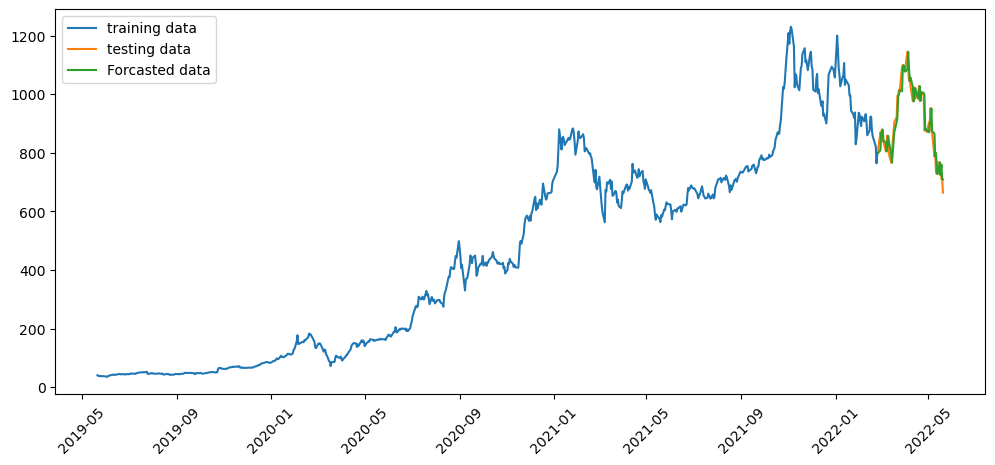

In [85]:
plt.figure(figsize = (12, 5))
plt.plot(train_data, label = 'training data')
plt.plot(test_data, label = 'testing data')
plt.plot(fc_series, label = 'Forcasted data')

plt.legend()
plt.xticks(rotation = 45)
plt.show()

### <font color = '#AA00FF'> Observation : 
* We can see that our predication is accurate one.

---

### Predict and Visualize for the future values  

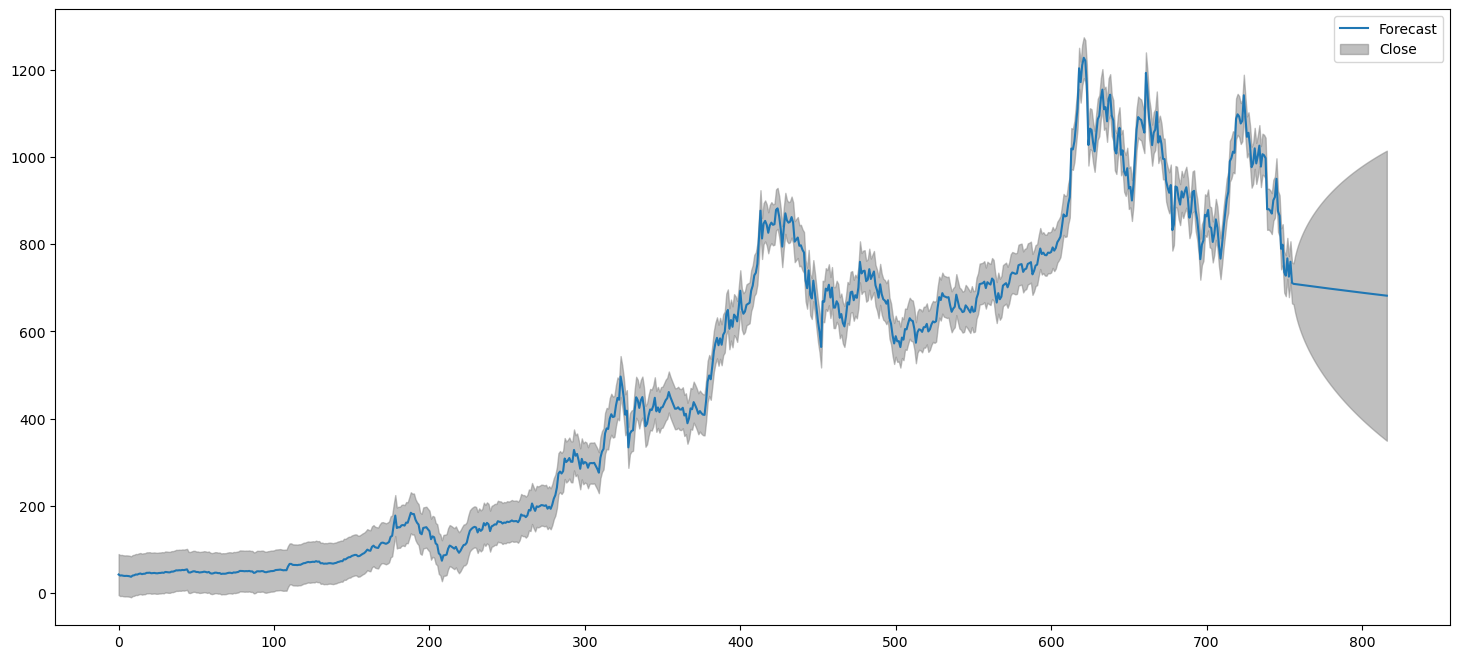

In [89]:
from statsmodels.graphics.tsaplots import plot_predict

fig = plt.figure(figsize = (18, 8))
ax1 = fig.add_subplot(111)

# here we are predicting next 60 days values
plot_predict(result = model, start = 1, end = len(df_close)+60, ax = ax1)
plt.legend(['Forecast', 'Close', '95% confidence interval'])

### <font color = '#AA00FF'> Observation : 
* We can see that our predication lie within the 95% confidence interval curve.
* Line present within the 95% confidence interval is our next 60 days prediction.

---

### SARIMA Value  

In [93]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 39.739481843974595


---

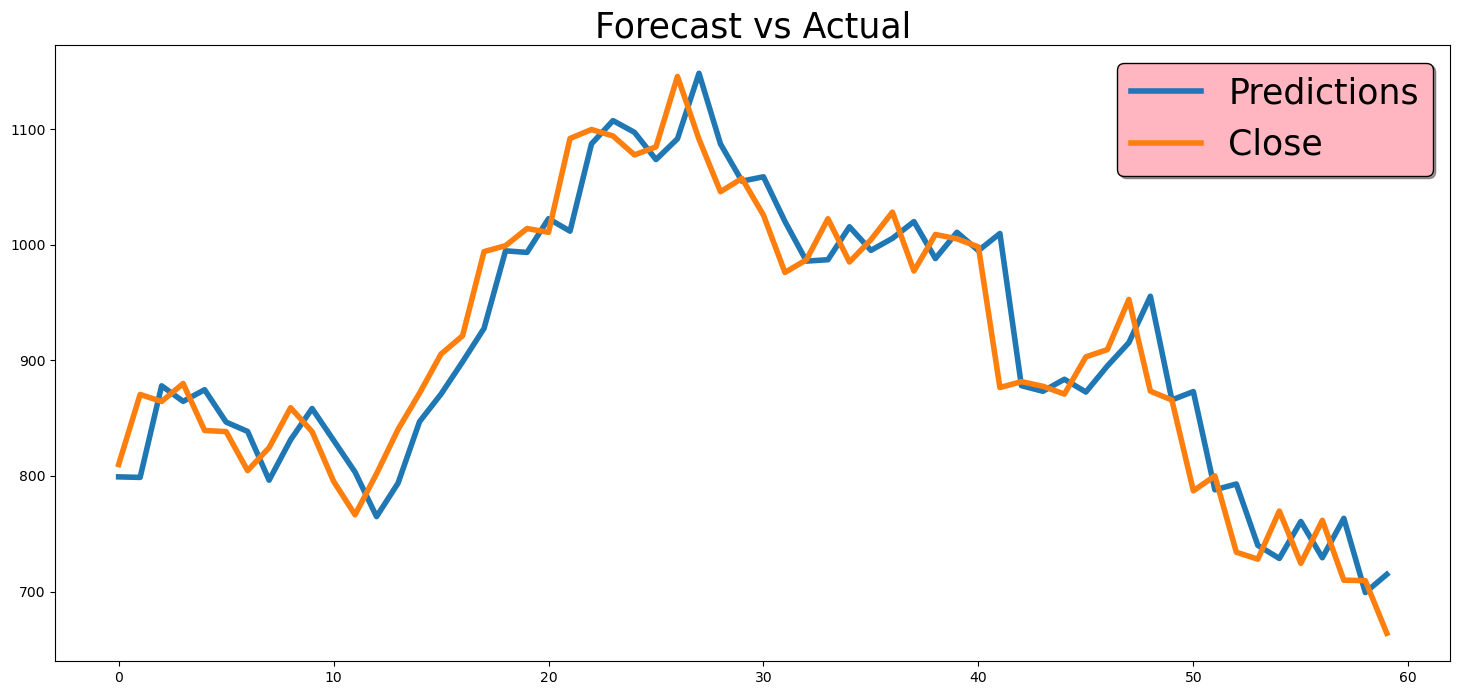

In [94]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')

---